# Predicción de Diabetes usando AutoML y Modelos Clásicos
Este notebook combina el uso de H2O AutoML con modelos clásicos de machine learning para predecir la probabilidad de diabetes, a partir de variables médicas y demográficas. El dataset limpio ha sido preparado previamente en un notebook de exploración, y aquí se parte desde su carga.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import h2o
from h2o.automl import H2OAutoML
from h2o.frame import H2OFrame
from h2o.estimators import H2OGradientBoostingEstimator


In [ ]:
h2o.init()

# Copiar dataset desde Drive a Colab
!cp "/content/drive/MyDrive/Prediccion de Diabetes - Proyecto Analitica/proyecto-diabetes-analitica/Datos/dataset_limpio.csv" /content/dataset_limpio.csv

# Cargar el dataset limpio
df = h2o.import_file("/content/dataset_limpio.csv")

# Asegurar que la variable objetivo esté como categórica
df['diabetes'] = df['diabetes'].asfactor()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpqjo7rek_
  JVM stdout: /tmp/tmpqjo7rek_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpqjo7rek_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_2v1rqa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## AutoML con H2O

In [ ]:
# Dividir el dataset en entrenamiento y test
train, test = df.split_frame(ratios=[0.8], seed=1234)

# Entrenar AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=1, balance_classes=True)
aml.train(y='diabetes', training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [ ]:
# Modelo líder
leader = aml.leader
perf = leader.model_performance(test_data=test)
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.02350842726007218
RMSE: 0.15332458139539198
LogLoss: 0.0841525810434917
AUC: 0.9768699106501992
AUCPR: 0.8764214589912402
Gini: 0.9537398213003985
Null degrees of freedom: 20036
Residual degrees of freedom: 20033
Null deviance: 11506.428604373195
Residual deviance: 3372.3305327368857
AIC: 3380.3305327368857

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7254833292040201
       0      1     Error    Rate
-----  -----  ----  -------  ---------------
0      18357  8     0.0004   (8.0/18365.0)
1      547    1125  0.3272   (547.0/1672.0)
Total  18904  1133  0.0277   (555.0/20037.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.725483     0.802139  65
max f2                       0.160345     0.78681   236
max f0point5                 0.848466     0.910052  57
max accuracy                 0.848466     0.972401  57
max precision                0.998452     1         0
max recall                   0.00145743   1         391
max specificity              0.998452     1         0
max absolute_mcc             0.848466     0.806037  57
max min_per_class_accuracy   0.0837606    0.905908  290
max mean_per_class_accuracy  0.0651654    0.908764  306
max tns                      0.998452     18365     0
max fns                      0.998452     1624      0
max fps                      8.59883e-05  18365     399
max tps                      0.00145743   1672      391
max tnr                      0.998452     1         0
max fnr                      0.998452     0.971292  0
max fpr                      8.59883e-05  1         399
max tpr                      0.00145743   1         391

Gains/Lift Table: Avg response rate:  8.34 %, avg score:  8.42 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100314                   0.994924           11.9839    11.9839            1                0.996998     1                           0.996998            0.120215        0.120215                   1098.39   1098.39            0.120215
2        0.020013                    0.988238           11.9839    11.9839            1                0.99152      1                           0.994266            0.119617        0.239833                   1098.39   1098.39            0.239833
3        0.0300444                   0.981478           11.9839    11.9839            1                0.98477      1                           0.991095            0.120215        0.360048                   1098.39   1098.39            0.360048
4        0.040026                    0.972229           11.9839    11.9839            1                0.977453     1                           0.987693            0.119617        0.479665                   1098.39   1098.39            0.479665
5        0.0500075                   0.953664           11.9839    11.9839            1                0.964832     1                           0.98313             0.119617        0.599282                   1098.39   1098.39            0.599282
6        0.100015                    0.201394           4.23382    8.10883            0.353293         0.417499     0.676647                    0.700314            0.211722        0.811005                   323.382   710.883            0.77572
7        0.150022                    0.0967115          1.65047    5.95605            0.137725         0.141199

In [ ]:
import shutil
import os

# Guardar el modelo (como carpeta)
model_dir = h2o.save_model(model=leader, path="/content", force=True)

# Nuevo nombre como carpeta
nuevo_nombre = "Modelo_Lider"
ruta_destino = f"/content/drive/MyDrive/Prediccion de Diabetes - Proyecto Analitica/proyecto-diabetes-analitica/Modelos/{nuevo_nombre}"

# Mover y renombrar la carpeta
shutil.move(model_dir, ruta_destino)
print(f"Modelo guardado en Drive como carpeta: {nuevo_nombre}")


Modelo guardado en Drive como carpeta: Modelo_Lider


## Comparación con modelos clásicos de ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar datos desde CSV para modelos clásicos
df_pd = pd.read_csv("/content/dataset_limpio.csv")

X = df_pd.drop("diabetes", axis=1)
y = df_pd["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print("LogReg Accuracy:", accuracy_score(y_test, logreg.predict(X_test_scaled)))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test_scaled)))


LogReg Accuracy: 0.95905
RF Accuracy: 0.96975


In [ ]:
modelo_final = h2o.load_model('/content/drive/MyDrive/Prediccion de Diabetes - Proyecto Analitica/proyecto-diabetes-analitica/Modelos/Modelo_Lider')


Generar un paciente al azar del dataset de prueba para predecir la probabilidad de que sea o no diabético

In [ ]:
# Seleccionamos un paciente al azar del conjunto de prueba
import random
fila_aleatoria = random.randint(0, test.nrows - 1)
nuevo_paciente_h2o = test[fila_aleatoria, :]

# Hacer predicción con el modelo
prediccion = modelo_final.predict(nuevo_paciente_h2o)

# Convertir a pandas para graficar o visualizar
import pandas as pd
resultado = prediccion.as_data_frame()
resultado['Fila'] = fila_aleatoria
print("\n🧪 Predicción para paciente en la fila", fila_aleatoria)
print(resultado)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%

🧪 Predicción para paciente en la fila 15325
   predict        p0        p1   Fila
0        0  0.974788  0.025212  15325


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


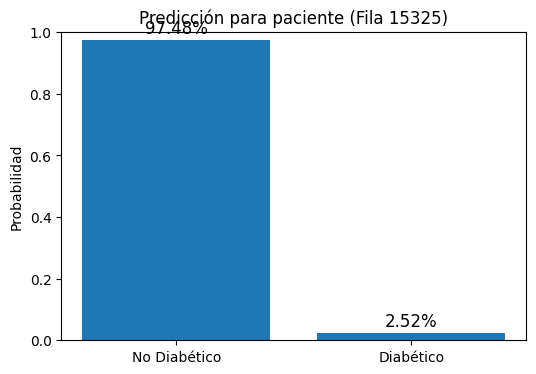

In [ ]:
import matplotlib.pyplot as plt

# Extraer probabilidades
p0 = resultado['p0'].iloc[0]
p1 = resultado['p1'].iloc[0]
etiquetas = ['No Diabético', 'Diabético']
probabilidades = [p0, p1]

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(etiquetas, probabilidades)
plt.title(f'Predicción para paciente (Fila {fila_aleatoria})')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)

# Añadir valores encima de las barras
for bar, prob in zip(bars, probabilidades):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{prob:.2%}', ha='center', fontsize=12)

plt.show()


## Importancia de Variables en el Modelo AutoML (XGBoost)

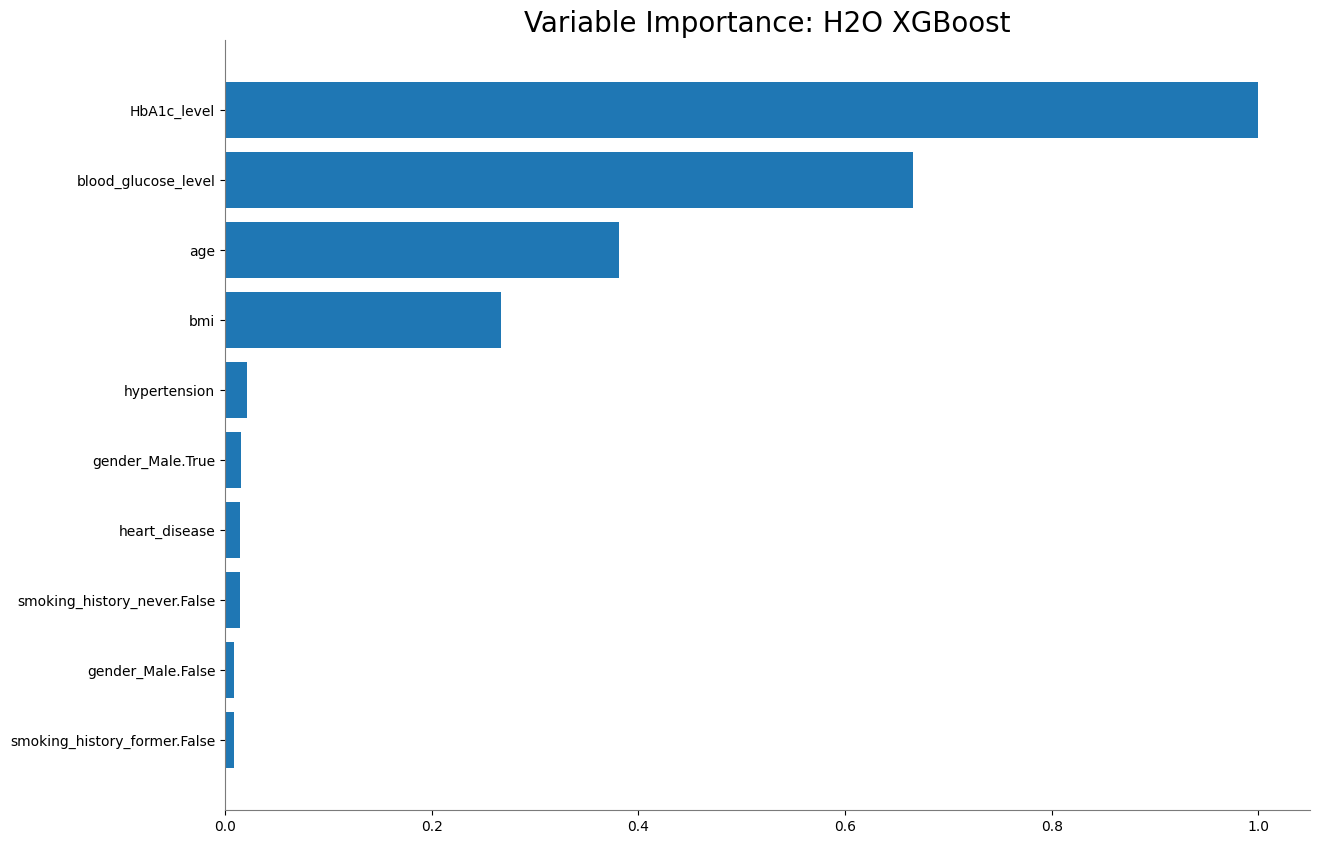

<Figure size 640x480 with 0 Axes>

In [ ]:
# Obtener el ID del primer modelo base del ensemble
primer_modelo_base_id = leader.base_models[0]

# Cargar ese modelo base
modelo_base = h2o.get_model(primer_modelo_base_id)

# Graficar la importancia de variables
modelo_base.varimp_plot()

